In [27]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import matplotlib.pyplot as plt



In [5]:
gldData=pd.read_csv('gldprice.csv')

In [6]:
gldData.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
gldData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
gldData.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [19]:
gldData.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
CR = gldData.corr()

<AxesSubplot:>

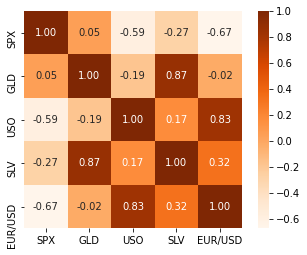

In [11]:
plt.figure.Figure(figsize=(8,8))
sns.heatmap(CR,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':10},cmap='Oranges')

In [12]:
print(CR['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


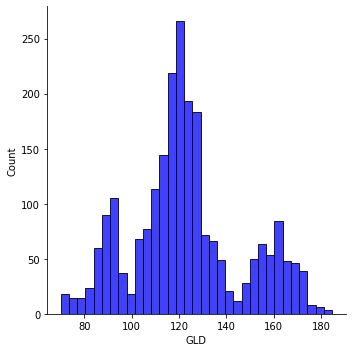

In [13]:
sns.displot(gldData['GLD'],color="blue")

In [14]:
gldData.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [15]:
OG = gldData.drop(["Date","GLD"],axis=1)
G = gldData["GLD"] 

In [16]:
print(G)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [17]:
print(OG)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [18]:
OG_train,OG_test,G_train,G_test = train_test_split(OG,G,test_size=0.2,random_state=2)

In [19]:
rfr = RandomForestRegressor(n_estimators=100)

In [20]:
rfr.fit(OG_train,G_train)

RandomForestRegressor()

In [21]:
testData_pred = rfr.predict(OG_test)

In [22]:
print(testData_pred)

[168.66739932  82.1098     116.30580019 127.5494006  120.84720121
 154.84809753 150.61929849 126.11580025 117.37989886 126.14409981
 116.50710068 172.09580105 141.44329917 167.89749889 115.15899997
 117.31270066 140.64070267 169.83040063 159.61620281 158.77519987
 155.01120015 125.13590042 176.66819939 157.03100359 125.09880055
  93.83109974  77.20290015 120.8218997  119.03839933 167.43990031
  88.14720041 125.17829994  91.01290068 117.69180041 121.0813989
 136.90360082 115.35740131 115.49090082 146.13119967 107.10260118
 104.1787024   87.17279793 126.44400071 117.79550089 153.51499947
 119.52940029 108.36059987 108.13309798  93.07850025 127.11039773
  74.95030027 113.5148989  121.28000006 111.29949897 118.87249884
 120.80519923 159.76529994 167.51170119 147.26089719  85.75479846
  94.43540036  86.83749862  90.6755003  119.07630084 126.42160088
 127.42819985 169.3878996  122.26129904 117.46959902  98.41510005
 168.4599003  142.86059865 132.5588019  121.30080206 121.15269937
 119.849600

In [23]:
er_scr=metrics.r2_score(G_test,testData_pred)

In [24]:
print("R squared error values",er_scr)

R squared error values 0.9893424955526022


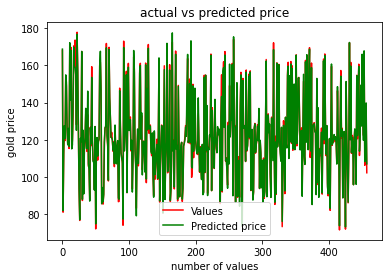

In [31]:
G_test = list(G_test)
plt.plot(G_test,color ="red",label="Values")
plt.plot(testData_pred,color="green",label="Predicted price")
plt.xlabel("number of values")
plt.ylabel("gold price")
plt.title('actual vs predicted price')
plt.legend()
plt.show()